**Window Functions for Discrete Fourier Transforms**

N. Stergioulas

Aristotle University of Thessaloniki

v1.0 (June 2020)

###### Content provided under a Creative Commons Attribution license, [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/); code under [GNU GPLv3 License](https://choosealicense.com/licenses/gpl-3.0/). (c)2020 [Nikolaos Stergioulas](http://www.astro.auth.gr/~niksterg/)




In [1]:
import numpy as np
from scipy import fftpack 
from scipy import signal
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import warnings
if not sys.warnoptions: warnings.simplefilter("ignore")

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 18
mpl.rc('xtick', labelsize=16) ; mpl.rc('ytick', labelsize=16) 
plt.rcParams['figure.figsize']=8,5 ; plt.rcParams['legend.fontsize']=16

**RECTANGULAR WINDOW**

In [3]:
T = 120 # total duration of the signal
N = 120 # number of samples

dt = T/N  # time step

In [4]:
t_n = np.linspace(0, (N-1)*dt, N)   # create the time samples
h_n = np.zeros(N)

In [5]:
for i in range (int(N/2-N/4), int(N/2+N/4)):
    h_n[i] = 1.0

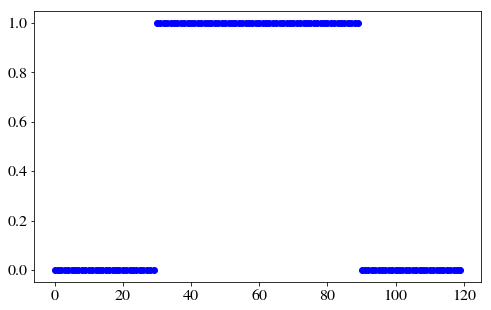

In [6]:
plt.plot(t_n, h_n,'bo')
plt.show()

In [7]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

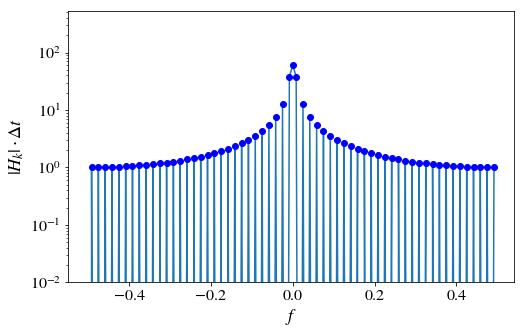

In [8]:
plt.plot(f_shift, np.abs(H_k_shift)*dt)
plt.plot(f_shift, np.abs(H_k_shift)*dt, 'bo')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|\cdot \Delta t$')
plt.yscale('log')
plt.ylim(bottom=1e-2)  
plt.show()

In [9]:
dt

1.0

**DFT-EVEN (PERIODIC) vs. SYMMETRIC HANN WINDOWS**

In [10]:
T = 1.0 # total duration of the signal
N = 12  # number of samples
D = N-1 # number of divisions

dt = T/D  # time step

In [11]:
t_n = np.linspace(0, D*dt, N)   # create the time samples
h_n_periodic = np.zeros(N)
h_n_symmetric = np.zeros(N)

for n in range (0,D+1):
    h_n_periodic[n] = (np.sin(np.pi*n/(D+1)))**(2)
    h_n_symmetric[n] = (np.sin(np.pi*n/D))**(2)

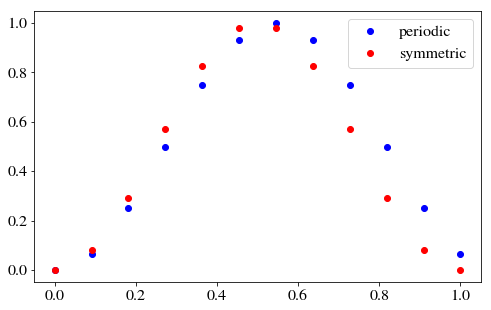

In [12]:
plt.plot(t_n, h_n_periodic,'bo')
plt.plot(t_n, h_n_symmetric,'ro')
plt.legend(['periodic','symmetric'], loc='best')
plt.show()

In [13]:
display(h_n_periodic)

array([0.       , 0.0669873, 0.25     , 0.5      , 0.75     , 0.9330127,
       1.       , 0.9330127, 0.75     , 0.5      , 0.25     , 0.0669873])

In [14]:
H_k_periodic = fftpack.fft(h_n_periodic)
H_k_periodic_shift = fftpack.fftshift(H_k_periodic)

H_k_symmetric = fftpack.fft(h_n_symmetric)
H_k_symmetric_shift = fftpack.fftshift(H_k_symmetric)

f_k = fftpack.fftfreq(h_n_periodic.size, d = dt) 
f_shift = fftpack.fftshift(f_k)

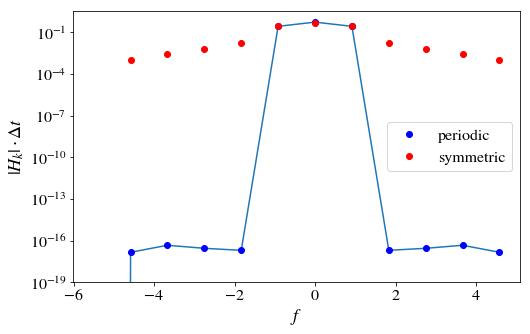

In [15]:
plt.plot(f_shift, np.abs(H_k_periodic_shift)*dt)
plt.plot(f_shift, np.abs(H_k_periodic_shift)*dt, 'bo')
plt.plot(f_shift, np.abs(H_k_symmetric_shift)*dt, 'ro')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|\cdot \Delta t$')
plt.legend(['_nolegend_','periodic','symmetric'], loc='best')
plt.yscale('log')
plt.ylim(bottom=1e-19)
plt.show()

**HAMMING, BLACKMAN and FLAT TOP WINDOWS**

In [16]:
T = 1.0 # total duration of the signal
N = 1200  # number of samples
D = N-1 # number of divisions

dt = T/D  # time step

In [17]:
t_n = np.linspace(0, D*dt, N)   # create the time samples
h_n = np.zeros(N)

# Hamming

a0 = 0.53836
a1 = 0.46164

#for n in range (0,D+1):
   # h_n[n] = a0 - a1*np.cos(2*np.pi*n/(D+1)) # periodic Hamming
   # h_n[n] = a0 - a1*np.cos(2*np.pi*n/(D)) # symmetric Hamming

# Blackman

a0 = 0.42
a1 = 0.5
a2 = 0.08

for n in range (0,D+1):
   # h_n[n] = a0 - a1*np.cos(2*np.pi*n/(D+1)) + a2*np.cos(4*np.pi*n/(D+1))# periodic Blackman
    h_n[n] = a0 - a1*np.cos(2*np.pi*n/D) + a2*np.cos(4*np.pi*n/D)# symmetric Blackman
    
# Flat top

a0 = 0.21557895
a1 = 0.41663158
a2 = 0.277263158
a3 = 0.083578947
a4 = 0.006947368

for n in range (0,D+1):
    h_n[n] = a0 - a1*np.cos(2*np.pi*n/(D+1)) + a2*np.cos(4*np.pi*n/(D+1)) - a3*np.cos(6*np.pi*n/(D+1)) + a4*np.cos(8*np.pi*n/(D+1)) # periodic flat top
    #h_n[n] = a0 - a1*np.cos(2*np.pi*n/D) + a2*np.cos(4*np.pi*n/D) - a3*np.cos(6*np.pi*n/D) + a4*np.cos(8*np.pi*n/D) # symmetric flat top


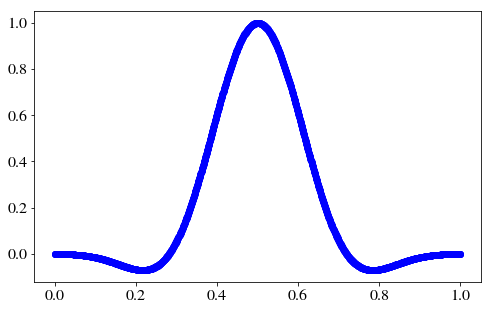

In [18]:
plt.plot(t_n, h_n,'bo')
plt.show()

In [19]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k)

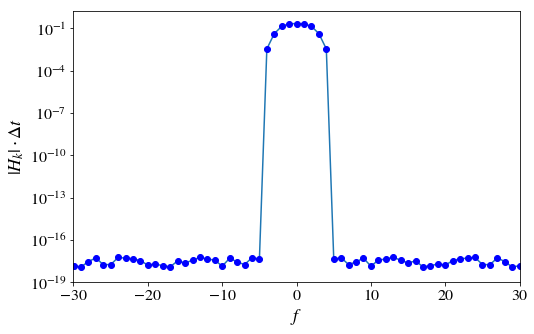

In [20]:
plt.plot(f_shift, np.abs(H_k_shift)*dt)
plt.plot(f_shift, np.abs(H_k_shift)*dt, 'bo')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|\cdot \Delta t$')
plt.yscale('log')
plt.ylim(bottom=1e-19)  
plt.xlim(-30,30)
plt.show()

**TUKEY WINDOW**

In [21]:
T = 1.0 # total duration of the signal
N = 1200  # number of samples
D = N-1 # number of divisions
L = N+1

dt = T/D  # time step

In [22]:
t_n = np.linspace(0, D*dt, N)   # create the time samples
h_n_periodic = np.zeros(N)
h_n_symmetric = np.zeros(N)

#alpha =0.5
alpha = 0.03

for n in range (0,D+1):
    h_n_periodic[n] = 1.0
    h_n_symmetric[n] = 1.0
    
# periodic 

for n in range (0,int(alpha*L/2)):
    h_n_periodic[n] = 0.5*(1.0 - np.cos(2*np.pi*n/(alpha*(D+1))))
    #h_n[n] = (np.sin(np.pi*n/(D+1)))**(2)
    
for n in range (N-int(alpha*L/2+1)+2,D+1):
    #h_n[n] = 0.5*(1.0 - np.cos(2*np.pi*n/(alpha*(L-1))))
    h_n_periodic[n] = 0.5*(1.0 - np.cos(2*np.pi*n/(alpha*(D+1))))
    
# symmetric 
    
for n in range (0,int(alpha*L/2)):
    h_n_symmetric[n] = 0.5*(1.0 - np.cos(2*np.pi*n/(alpha*L)))
    h_n_symmetric[D-n] = 0.5*(1.0 - np.cos(2*np.pi*n/(alpha*L)))


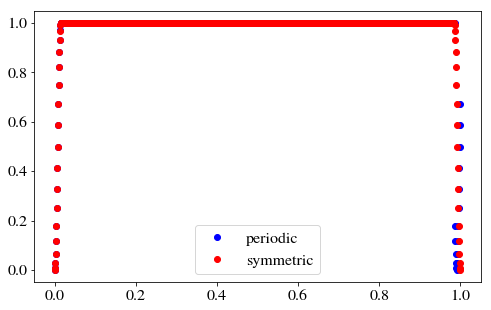

In [23]:
plt.plot(t_n, h_n_periodic,'bo')
plt.plot(t_n, h_n_symmetric,'ro')
plt.legend(['periodic','symmetric'], loc='best')
plt.show()

In [24]:
H_k_periodic = fftpack.fft(h_n_periodic)
H_k_periodic_shift = fftpack.fftshift(H_k_periodic)

H_k_symmetric = fftpack.fft(h_n_symmetric)
H_k_symmetric_shift = fftpack.fftshift(H_k_symmetric)

f_k = fftpack.fftfreq(h_n_periodic.size, d = dt) 
f_shift = fftpack.fftshift(f_k)

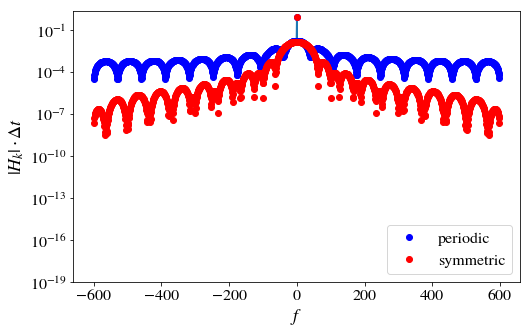

In [25]:
plt.plot(f_shift, np.abs(H_k_periodic_shift)*dt)
plt.plot(f_shift, np.abs(H_k_periodic_shift)*dt, 'bo')
plt.plot(f_shift, np.abs(H_k_symmetric_shift)*dt, 'ro')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|\cdot \Delta t$')
plt.legend(['_nolegend_','periodic','symmetric'], loc='best')
plt.yscale('log')
plt.ylim(bottom=1e-19)
#plt.xlim(-40,40)
plt.show()

**PLANCK-TAPER**

In [26]:
T = 1.0 # total duration of the signal
N = 1200  # number of samples
D = N-1 # number of divisions
L = N+1

dt = T/D  # time step

In [27]:
t_n = np.linspace(0, D*dt, N)   # create the time samples
h_n_PT = np.zeros(N)

#epsilon =0.283    # similar to Tukey alpha=0.5
#epsilon =0.1415    # similar to Tukey alpha=0.25
epsilon = 0.03

for n in range (0,D+1):
    h_n_PT[n] = 1.0

for n in range (1,D+1):
    h_n_PT[n] = 1.0
    
h_n_PT[0] = 0.0
h_n_PT[D] = 0.0
    
for n in range (1,int(epsilon*D)):
    h_n_PT[n] = 1.0/(1.0+np.exp(epsilon*D/n-epsilon*D/(epsilon*D-n)))
    h_n_PT[D-n] = 1.0/(1.0+np.exp(epsilon*D/n-epsilon*D/(epsilon*D-n)))

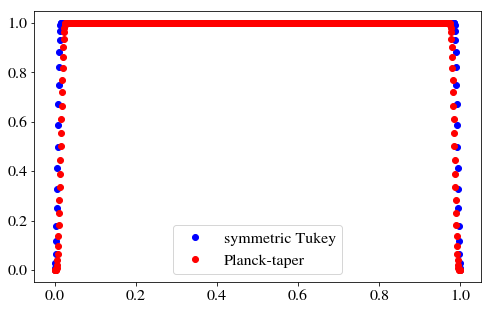

In [28]:
#plt.plot(t_n, h_n_periodic,'bo')
plt.plot(t_n, h_n_symmetric,'bo')
plt.plot(t_n, h_n_PT,'ro')

plt.legend(['symmetric Tukey', 'Planck-taper'], loc='best')
plt.show()

In [29]:
H_k_PT = fftpack.fft(h_n_PT)
H_k_PT_shift = fftpack.fftshift(H_k_PT)

f_k = fftpack.fftfreq(h_n_PT.size, d = dt) 
f_shift = fftpack.fftshift(f_k)

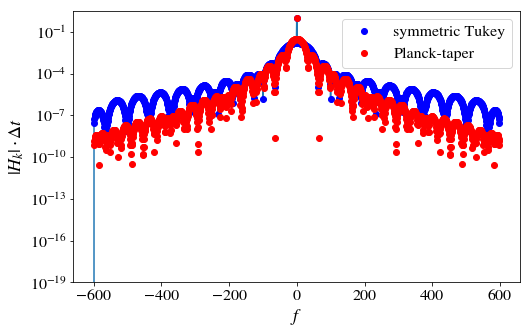

In [30]:
plt.plot(f_shift, np.abs(H_k_symmetric_shift)*dt)
plt.plot(f_shift, np.abs(H_k_symmetric_shift)*dt, 'bo')
plt.plot(f_shift, np.abs(H_k_PT_shift)*dt, 'ro')
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|\cdot \Delta t$')
plt.legend(['_nolegend_','symmetric Tukey', 'Planck-taper'], loc='best')
plt.yscale('log')
plt.ylim(bottom=1e-19)
#plt.xlim(-40,40)
plt.show()

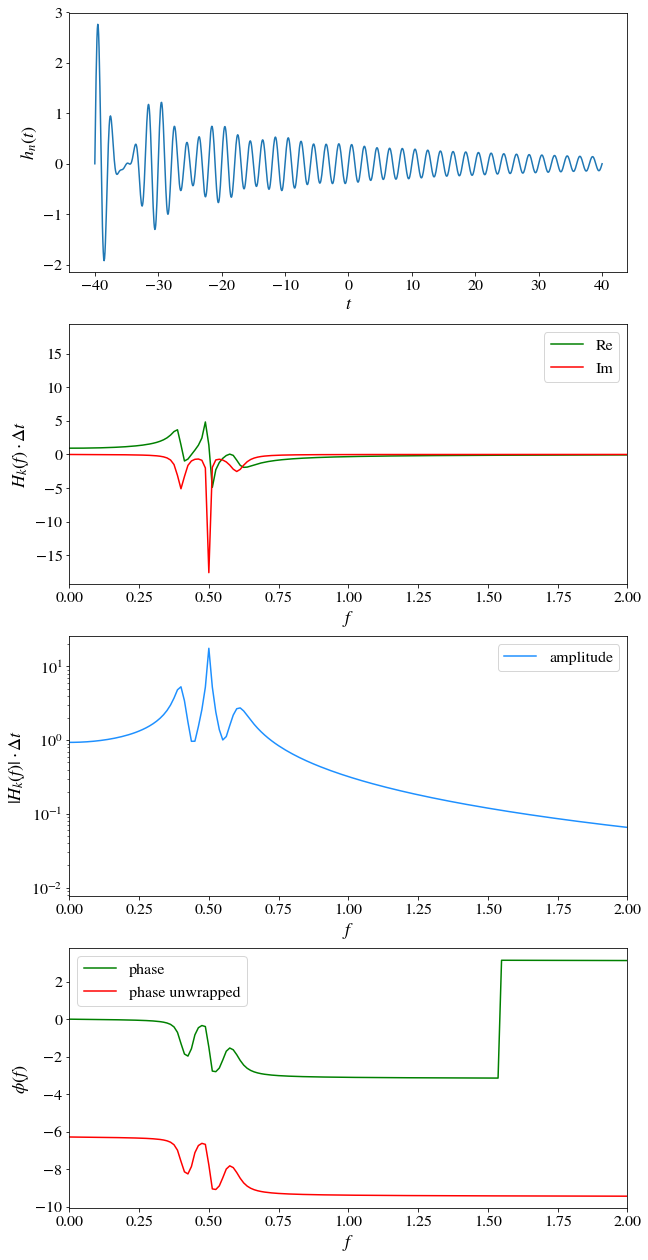

In [31]:
f0 = 0.5

A0 = 1.0
Anoise = 0.0

D=1200
N=D+1
L=N+1

t_n = np.linspace(-40, 40, D+1)       # linearly space time array 

h_n = np.sin(2.0*np.pi*f0*t_n)*np.exp(-(t_n+40)/40) \
    + 1.0*np.sin(2.0*np.pi*0.8*f0*t_n)*np.exp(-(t_n+40)/10) \
    + 1.0*np.sin(2.0*np.pi*1.2*f0*t_n)*np.exp(-(t_n+40)/5) 

for i in range(0,D+1):              # add noise
    h_n[i] += Anoise*random.randint(-10,10)
    
dt = t_n[1] - t_n[0] # increment between times in time array

H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

A = np.abs(H_k_shift)

A_rect = A

phase = np.angle(H_k_shift)
phase_unwrap = np.unwrap(phase)

fig = plt.figure(1, figsize=(10,22), frameon=False)

ax1 = fig.add_subplot(411)
ax1.plot(t_n, h_n)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$h_n(t)$')

ax2 = fig.add_subplot(412)
ax2.plot(f_shift, np.real(H_k_shift)*dt, color='green', label='Re')
ax2.plot(f_shift, np.imag(H_k_shift)*dt, color='red', label='Im')
ax2.legend()
ax2.set_xlim(0,2)
ax2.set_xlabel(r'$f$')
ax2.set_ylabel(r'$H_k(f) \cdot \Delta t$')

ax3 = fig.add_subplot(413)
ax3.plot(f_shift, A*dt, color='dodgerblue', label='amplitude')
ax3.set_yscale("log", nonposy='clip')
ax3.set_xlim(0,2)
ax3.legend()
ax3.set_xlabel(r'$f$')
ax3.set_ylabel(r'$|H_k(f)|\cdot \Delta t$')

ax4 = fig.add_subplot(414)
ax4.plot(f_shift, phase, color='green', label='phase')
ax4.plot(f_shift, phase_unwrap, color='red', label='phase unwrapped')
ax4.legend()
ax4.set_xlim(0,2)
ax4.set_xlabel(r'$f$')
ax4.set_ylabel(r'$\phi(f)$')
plt.show()

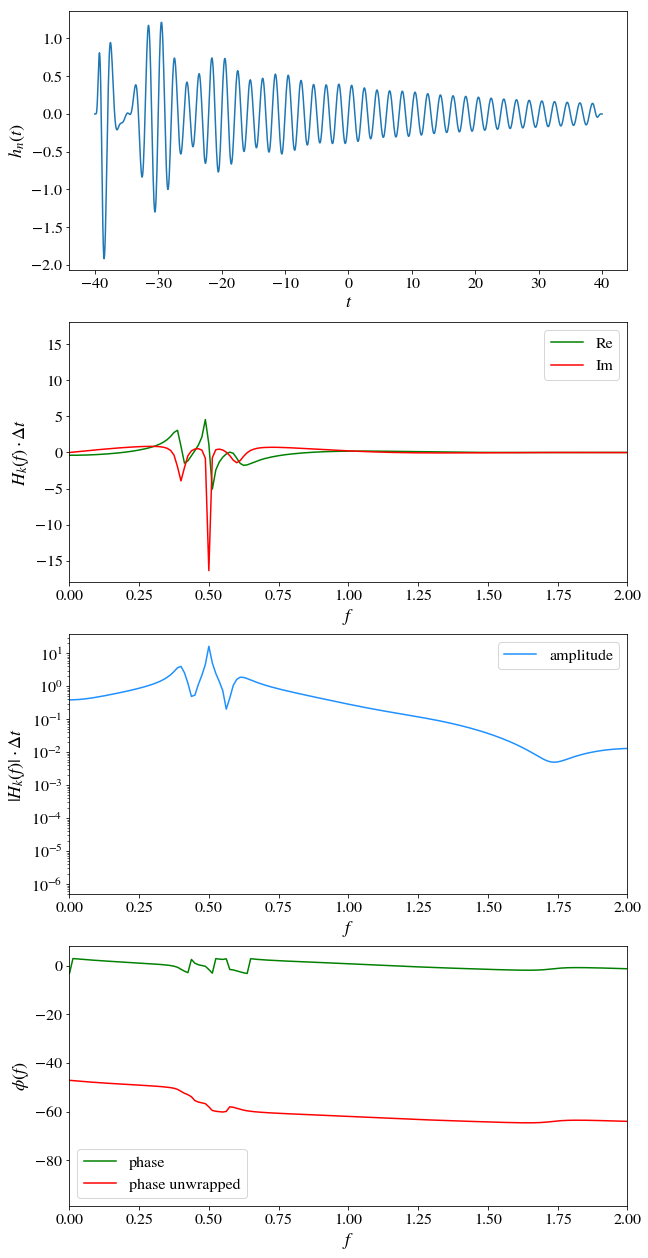

In [32]:

f0 = 0.5

A0 = 1.0
#Anoise = 0.002

t_n = np.linspace(-40, 40, D+1)       # linearly space time array 

h_n = np.sin(2.0*np.pi*f0*t_n)*np.exp(-(t_n+40)/40) \
    + 1.0*np.sin(2.0*np.pi*0.8*f0*t_n)*np.exp(-(t_n+40)/10) \
    + 1.0*np.sin(2.0*np.pi*1.2*f0*t_n)*np.exp(-(t_n+40)/5) 

for i in range(0,D+1):              # add noise
    h_n[i] += Anoise*random.randint(-10,10)
    
epsilon =0.02

#D=400

h_n_PT = np.zeros(N)

for n in range (0,D+1):
    h_n_PT[n] = 1.0

for n in range (1,D+1):
    h_n_PT[n] = 1.0
    
h_n_PT[0] = 0.0
h_n_PT[D] = 0.0
    
for n in range (1,int(epsilon*D)):
    h_n_PT[n] = 1.0/(1.0+np.exp(epsilon*D/n-epsilon*D/(epsilon*D-n)))
    h_n_PT[D-n] = 1.0/(1.0+np.exp(epsilon*D/n-epsilon*D/(epsilon*D-n)))

for i in range(0,D+1): 
    h_n[i] = h_n_PT[i]*h_n[i]
    
dt = t_n[1] - t_n[0] # increment between times in time array

H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

A = np.abs(H_k_shift)

A_PT = A

phase = np.angle(H_k_shift)
phase_unwrap = np.unwrap(phase)

fig = plt.figure(1, figsize=(10,22), frameon=False)

ax1 = fig.add_subplot(411)
ax1.plot(t_n, h_n)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$h_n(t)$')

ax2 = fig.add_subplot(412)
ax2.plot(f_shift, np.real(H_k_shift)*dt, color='green', label='Re')
ax2.plot(f_shift, np.imag(H_k_shift)*dt, color='red', label='Im')
ax2.legend()
ax2.set_xlim(0,2)
ax2.set_xlabel(r'$f$')
ax2.set_ylabel(r'$H_k(f) \cdot \Delta t$')

ax3 = fig.add_subplot(413)
ax3.plot(f_shift, A*dt, color='dodgerblue', label='amplitude')
ax3.set_yscale("log", nonposy='clip')
ax3.set_xlim(0,2)
ax3.legend()
ax3.set_xlabel(r'$f$')
ax3.set_ylabel(r'$|H_k(f)|\cdot \Delta t$')

ax4 = fig.add_subplot(414)
ax4.plot(f_shift, phase, color='green', label='phase')
ax4.plot(f_shift, phase_unwrap, color='red', label='phase unwrapped')
ax4.legend()
ax4.set_xlim(0,2)
ax4.set_xlabel(r'$f$')
ax4.set_ylabel(r'$\phi(f)$')
plt.show()

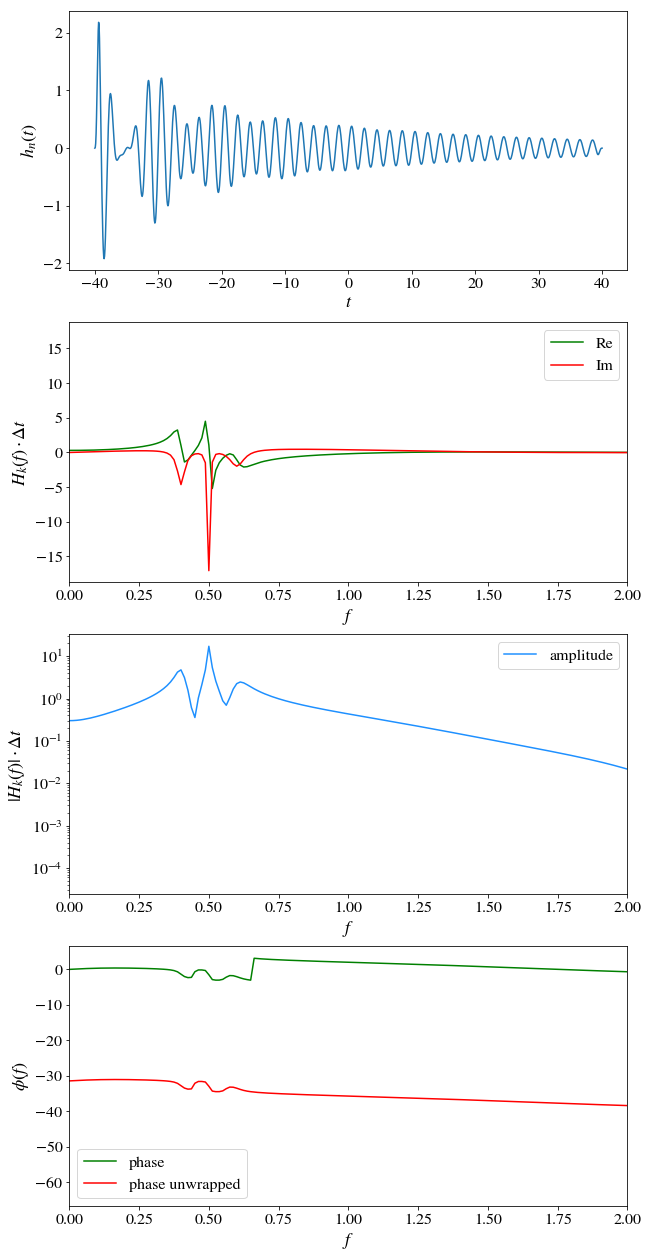

In [33]:
f0 = 0.5

A0 = 1.0
#Anoise = 0.002

t_n = np.linspace(-40, 40, D+1)       # linearly space time array 

h_n = np.sin(2.0*np.pi*f0*t_n)*np.exp(-(t_n+40)/40) \
    + 1.0*np.sin(2.0*np.pi*0.8*f0*t_n)*np.exp(-(t_n+40)/10) \
    + 1.0*np.sin(2.0*np.pi*1.2*f0*t_n)*np.exp(-(t_n+40)/5) 

for i in range(0,D+1):              # add noise
    h_n[i] += Anoise*random.randint(-10,10)
    
#epsilon =0.1   

#N = 401  # number of samples
#D = N-1 # number of divisions
#L = N+1

alpha =0.02

h_n_periodic = np.zeros(N)
h_n_symmetric = np.zeros(N)

for n in range (0,D+1):
    h_n_periodic[n] = 1.0
    h_n_symmetric[n] = 1.0
    
# periodic 

for n in range (0,int(alpha*L/2)):
    h_n_periodic[n] = 0.5*(1.0 - np.cos(2*np.pi*n/(alpha*(D+1))))
    
for n in range (N-int(alpha*L/2+1)+2,D+1):
     h_n_periodic[n] = 0.5*(1.0 - np.cos(2*np.pi*n/(alpha*(D+1))))
    
# symmetric 
    
for n in range (0,int(alpha*L/2)):
    h_n_symmetric[n] = 0.5*(1.0 - np.cos(2*np.pi*n/(alpha*L)))
    h_n_symmetric[D-n] = 0.5*(1.0 - np.cos(2*np.pi*n/(alpha*L)))
    
for i in range(0,D+1): 
    h_n[i] = h_n_symmetric[i]*h_n[i]
  #  h_n[i] = h_n_periodic[i]*h_n[i]
    
dt = t_n[1] - t_n[0] # increment between times in time array

H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

A = np.abs(H_k_shift)

A_Tukey = A

phase = np.angle(H_k_shift)
phase_unwrap = np.unwrap(phase)

fig = plt.figure(1, figsize=(10,22), frameon=False)

ax1 = fig.add_subplot(411)
ax1.plot(t_n, h_n)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$h_n(t)$')

ax2 = fig.add_subplot(412)
ax2.plot(f_shift, np.real(H_k_shift)*dt, color='green', label='Re')
ax2.plot(f_shift, np.imag(H_k_shift)*dt, color='red', label='Im')
ax2.legend()
ax2.set_xlim(0,2)
ax2.set_xlabel(r'$f$')
ax2.set_ylabel(r'$H_k(f) \cdot \Delta t$')

ax3 = fig.add_subplot(413)
ax3.plot(f_shift, A*dt, color='dodgerblue', label='amplitude')
ax3.set_yscale("log", nonposy='clip')
ax3.set_xlim(0,2)
ax3.legend()
ax3.set_xlabel(r'$f$')
ax3.set_ylabel(r'$|H_k(f)|\cdot \Delta t$')

ax4 = fig.add_subplot(414)
ax4.plot(f_shift, phase, color='green', label='phase')
ax4.plot(f_shift, phase_unwrap, color='red', label='phase unwrapped')
ax4.legend()
ax4.set_xlim(0,2)
ax4.set_xlabel(r'$f$')
ax4.set_ylabel(r'$\phi(f)$')
plt.show()

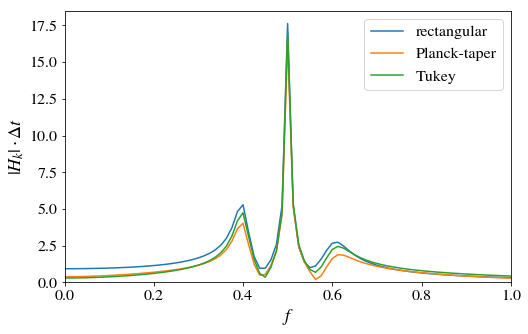

In [34]:
plt.plot(f_shift, np.abs(A_rect)*dt)
plt.plot(f_shift, np.abs(A_PT)*dt)
plt.plot(f_shift, np.abs(A_Tukey)*dt)
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|\cdot \Delta t$')
plt.legend(['rectangular','Planck-taper', 'Tukey'], loc='best')
#plt.yscale('log')
plt.ylim(bottom=1e-4)
plt.xlim(0,1)
plt.show()

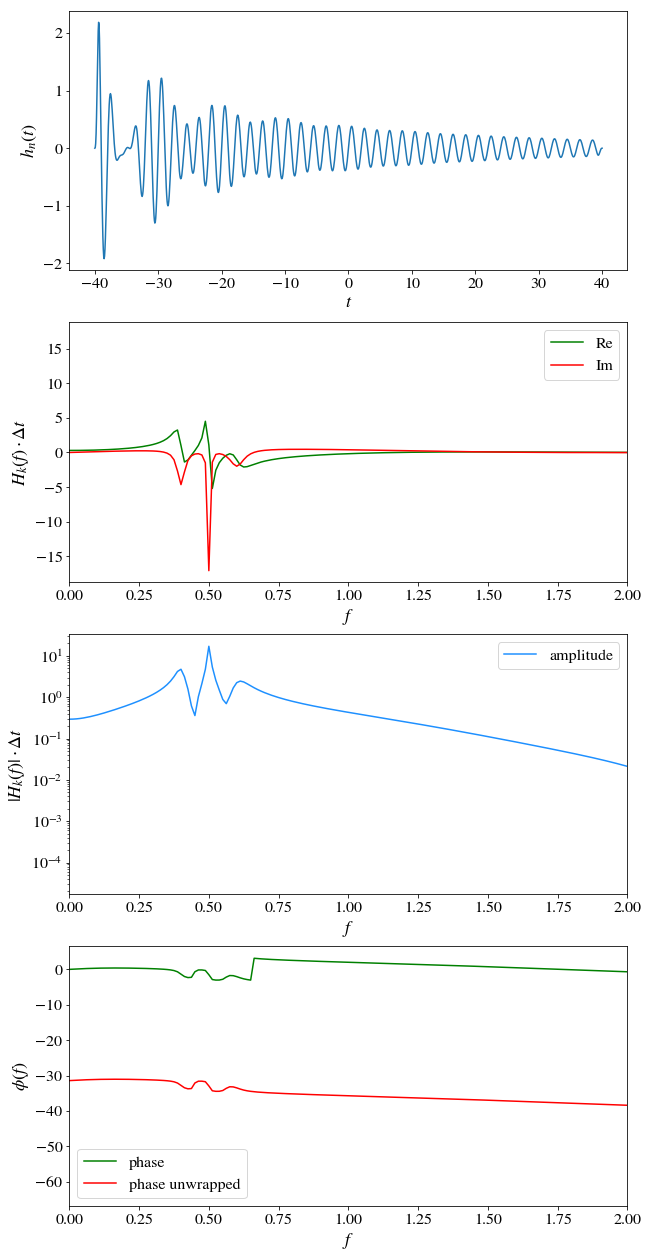

In [35]:
f0 = 0.5

A0 = 1.0
#Anoise = 0.002

t_n = np.linspace(-40, 40, D+1)       # linearly space time array 

h_n = np.sin(2.0*np.pi*f0*t_n)*np.exp(-(t_n+40)/40) \
    + 1.0*np.sin(2.0*np.pi*0.8*f0*t_n)*np.exp(-(t_n+40)/10) \
    + 1.0*np.sin(2.0*np.pi*1.2*f0*t_n)*np.exp(-(t_n+40)/5) 

for i in range(0,D+1):              # add noise
    h_n[i] += Anoise*random.randint(-10,10)
    

window = signal.tukey(N,0.02,sym=False)

h_n *= window

dt = t_n[1] - t_n[0] # increment between times in time array

H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

A = np.abs(H_k_shift)

A_Tukey = A

phase = np.angle(H_k_shift)
phase_unwrap = np.unwrap(phase)

fig = plt.figure(1, figsize=(10,22), frameon=False)

ax1 = fig.add_subplot(411)
ax1.plot(t_n, h_n)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$h_n(t)$')

ax2 = fig.add_subplot(412)
ax2.plot(f_shift, np.real(H_k_shift)*dt, color='green', label='Re')
ax2.plot(f_shift, np.imag(H_k_shift)*dt, color='red', label='Im')
ax2.legend()
ax2.set_xlim(0,2)
ax2.set_xlabel(r'$f$')
ax2.set_ylabel(r'$H_k(f) \cdot \Delta t$')

ax3 = fig.add_subplot(413)
ax3.plot(f_shift, A*dt, color='dodgerblue', label='amplitude')
ax3.set_yscale("log", nonposy='clip')
ax3.set_xlim(0,2)
ax3.legend()
ax3.set_xlabel(r'$f$')
ax3.set_ylabel(r'$|H_k(f)|\cdot \Delta t$')

ax4 = fig.add_subplot(414)
ax4.plot(f_shift, phase, color='green', label='phase')
ax4.plot(f_shift, phase_unwrap, color='red', label='phase unwrapped')
ax4.legend()
ax4.set_xlim(0,2)
ax4.set_xlabel(r'$f$')
ax4.set_ylabel(r'$\phi(f)$')
plt.show()